In [1]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [17]:
# 停用詞清單 
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords

# 進行分詞  
def seg_sentence(sentence):
    sentence_seged = jieba.cut(sentence.strip())
    stopwords = stopwordslist('stopword2.txt') 
    outstr = ''
    for word in sentence_seged:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr


In [18]:
inputs = open('lightning.txt', 'r', encoding='utf-8')
outputs = open('output.txt', 'w', encoding='utf-8')
for line in inputs:
    line_seg = seg_sentence(line)  # 返回值是字串
    outputs.write(line_seg + '\n')
outputs.close()
inputs.close()


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache


Loading model cost 0.705 seconds.
Prefix dict has been built successfully.


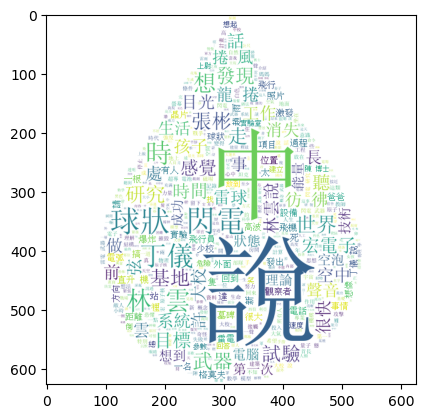

(0.0, 1.0, 0.0, 1.0)

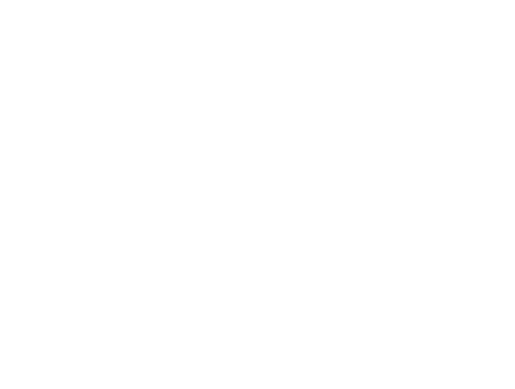

In [19]:
mask_img = np.array(Image.open("img/mask.jpg"))# 指定背景圖 
inputs = open('output.txt', 'r', encoding='utf-8')
mytext = inputs.read()
wordcloud = WordCloud(background_color="white", max_words=500, width=2000, height=1600, margin=2, #----->字與字的距離2個像素 
                      font_path="simsun.ttf", mask=mask_img).generate(mytext)
plt.imshow(wordcloud)
plt.show()
plt.savefig("result.png")
plt.axis("off")

